# USGS dataretrieval Python Package `get_stats()` Examples

This notebook provides examples of using the Python dataretrieval package to retrieve statistics for observed variables at a United States Geological Survey (USGS) monitoring site. The dataretrieval package provides a collection of functions to get data from the USGS National Water Information System (NWIS) and other online sources of hydrology and water quality data, including the United States Environmental Protection Agency (USEPA).

### Install the Package

Use the following code to install the package if it doesn't exist already within your Jupyter Python environment.

In [1]:
!pip install dataretrieval

Defaulting to user installation because normal site-packages is not writeable


Load the package so you can use it along with other packages used in this notebook.

In [2]:
from dataretrieval import nwis
from IPython.display import display
from matplotlib import ticker

### Basic Usage

The dataretrieval package has several functions that allow you to retrieve data from different web services. This examples uses the `get_stats()` function to retrieve statistics for observed variable(s) for a USGS monitoring site from USGS NWIS. The following arguments are available:

Arguments (Additional parameters, if supplied, will be used as query parameters).

* **sites** (string or list of strings): A string or list of strings contining the USGS site identifiers for which to retrive data.
* **parameterCd** (string or list of strings): A list of USGS parameter codes for which to retrieve data.
* **statReportType** (string): The aggregation period for which statistics should be reported. Can be specified as 'daily' (default), 'monthly', or 'annual'.
* **statTypeCd** (string): The type of statistic to be returned in the result. Can be specified as 'all', 'mean', 'max', 'min', or 'median'

#### Example 1: Get all of the annual mean discharge data for a single site

In [3]:
# Set the parameters needed to retrieve data
siteNumber = "02319394"
parameterCode = "00060" # Discharge

# Retrieve the statistics
x1 = nwis.get_stats(sites=siteNumber, parameterCd=parameterCode, statReportType="annual")
print("Retrieved " + str(len(x1[0])) + " data values.")

Retrieved 20 data values.


### Interpreting the Result

The result of calling the `get_stats()` function is an object that contains a Pandas data frame object and an associated metadata object. The Pandas data frame contains the statistics values for the site and observed variable requested.

Once you've got the data frame, there's several useful things you can do to explore the data.

In [4]:
# Display the data frame as a table
display(x1[0])

,agency_cd,site_no,parameter_cd,ts_id,loc_web_ds,year_nu,mean_va,count_nu
0,USGS,02319394,00060,26452,NaN,2001,1404.0,365
1,USGS,02319394,00060,26452,NaN,2002,795.9,365
2,USGS,02319394,00060,26452,NaN,2003,3395.0,365
3,USGS,02319394,00060,26452,NaN,2004,2471.0,366
4,USGS,02319394,00060,26452,NaN,2005,3764.0,365
5,USGS,02319394,00060,26452,NaN,2006,1029.0,365
6,USGS,02319394,00060,26452,NaN,2007,688.5,365
7,USGS,02319394,00060,26452,NaN,2008,2186.0,366
8,USGS,02319394,00060,26452,NaN,2009,2620.0,365
9,USGS,02319394,00060,26452,NaN,2012,784.3,366


Show the data types of the columns in the resulting data frame.

In [5]:
print(x1[0].dtypes)

agency_cd        object
site_no          object
parameter_cd     object
ts_id             int64
loc_web_ds      float64
year_nu           int64
mean_va         float64
count_nu          int64
dtype: object


Make a quick time series plot of the annual mean values.

Text(0, 0.5, 'Annual mean discharge (cfs)')

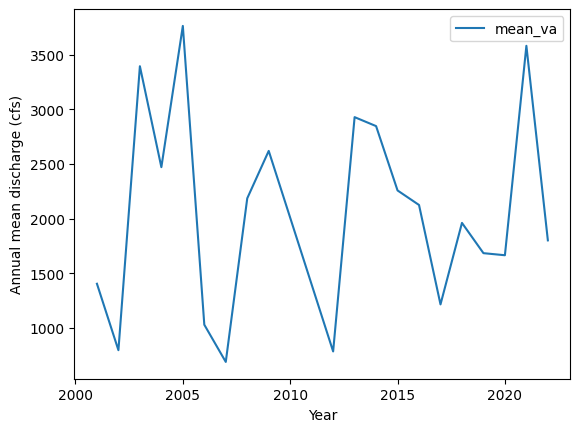

In [6]:
ax = x1[0].plot(x='year_nu', y='mean_va')
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.set_xlabel('Year')
ax.set_ylabel('Annual mean discharge (cfs)')

The other part of the result returned from the `get_stats()` function is a metadata object that contains information about the query that was executed to return the data. For example, you can access the URL that was assembled to retrieve the requested data from the USGS web service. The USGS web service responses contain a descriptive header that defines and can be helpful in interpreting the contents of the response.

In [7]:
print("The query URL used to retrieve the data from NWIS was: " + x1[1].url)

The query URL used to retrieve the data from NWIS was: https://waterservices.usgs.gov/nwis/stat?sites=02319394&parameterCd=00060&statReportType=annual&format=rdb


### Additional Examples

#### Example 2: Get all of the annual mean discharge data for two sites

Note: Passing multiple parameters (temperature and flow) looks like it returns only what is available (in this example flow, 00060)

In [8]:
x2 = nwis.get_stats(sites=["02319394", "02171500"], parameterCd=["00010", "00060"],
                    statReportType="annual")
display(x2[0])

,agency_cd,site_no,parameter_cd,ts_id,loc_web_ds,year_nu,mean_va,count_nu
0,USGS,02171500,00010,306223,NaN,2023,20.12,365
1,USGS,02171500,00010,306223,NaN,2024,20.24,366
2,USGS,02171500,00060,125737,NaN,1943,3026.00,365
3,USGS,02171500,00060,125737,NaN,1944,3966.00,366
4,USGS,02171500,00060,125737,NaN,1945,2577.00,365
...,...,...,...,...,...,...,...,...
92,USGS,02319394,00060,26452,NaN,2018,1961.00,365
93,USGS,02319394,00060,26452,NaN,2019,1684.00,365
94,USGS,02319394,00060,26452,NaN,2020,1665.00,366
95,USGS,02319394,00060,26452,NaN,2021,3582.00,365


#### Example 3: Request daily mean and median values for temperature and discharge for a site for years between 2000 and 2007

NOTE: The startDt and endDt parameters are not directly supported by this function but are turned into query parameters in the request to USGS NWIS, which means that they can be used to limit the time window requested.

In [9]:
x3 = nwis.get_stats(sites="02171500", parameterCd=["00010", "00060"],
                    statReportType="daily", statTypeCd=["mean", "median"],
                    startDt="2000", endDt="2007")
display(x3[0])

,agency_cd,site_no,parameter_cd,ts_id,loc_web_ds,month_nu,day_nu,begin_yr,end_yr,count_nu,mean_va,p50_va
0,USGS,02171500,00010,306223,NaN,1,1,2006,2006,1,9.5,9.5
1,USGS,02171500,00010,306223,NaN,1,2,2006,2006,1,9.7,9.7
2,USGS,02171500,00010,306223,NaN,1,3,2006,2006,1,10.3,10.3
3,USGS,02171500,00010,306223,NaN,1,4,2006,2006,1,10.1,10.1
4,USGS,02171500,00010,306223,NaN,1,5,2006,2006,1,10.3,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...
708,USGS,02171500,00060,125737,NaN,12,27,2001,2008,8,631.0,628.0
709,USGS,02171500,00060,125737,NaN,12,28,2001,2008,8,616.0,626.0
710,USGS,02171500,00060,125737,NaN,12,29,2001,2008,8,605.0,624.0
711,USGS,02171500,00060,125737,NaN,12,30,2001,2008,8,610.0,629.0
